In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
cancer = pd.read_excel('/kaggle/input/cancer-patients-data/cancer patient data sets.xlsx')

## Checking Data

In [3]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# Knowing Number of Rows And Columns

cancer.shape
print(f"The Number Of Rows : {cancer.shape[0]}")
print(f"The Number Of Columns is : {cancer.shape[1]}")

The Number Of Rows : 1000
The Number Of Columns is : 25


In [5]:
# Getting some information about data
# All The Data is int except (Patient Id, Level) are object

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
# Getting Descreptive information about data

cancer.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
# Showing Null Values

cancer.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
# Showing Duplicates

duplicated_values = cancer[cancer.duplicated()]
duplicated_values

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


There Is No Duplicated Data

In [9]:
cancer.nunique()

Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [10]:
cancer['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [11]:
# Drop Unneeded columns

cancer = cancer.drop(['Patient Id'], axis=1)
cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


## Applying Label Encoder

In [12]:
encoder = LabelEncoder()
encoded_level = encoder.fit_transform(cancer['Level'])

In [13]:
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
encoded_level_df = pd.DataFrame(encoded_level)

In [15]:
cancer = cancer.drop('Level', axis=1)
cancer = pd.concat([cancer,encoded_level_df], axis=1)

In [16]:
# The Column Level is now renamed 0

cancer.columns

Index([                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          0],
      dtype='object')

In [17]:
# Rename the column Level wit it's original name

cancer.columns=[                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          'Level']

In [18]:
cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


<Axes: xlabel='Age', ylabel='Density'>

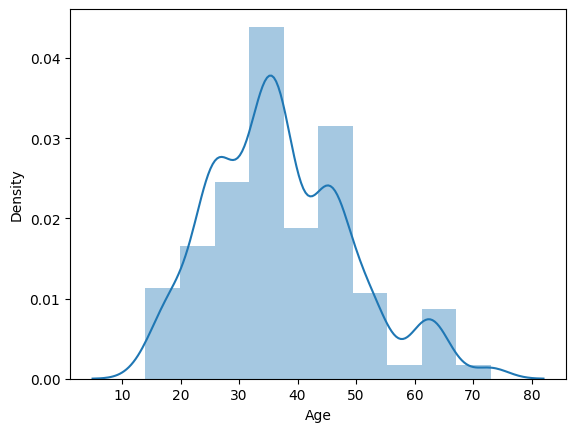

In [19]:
sns.distplot(cancer['Age'], bins=10)

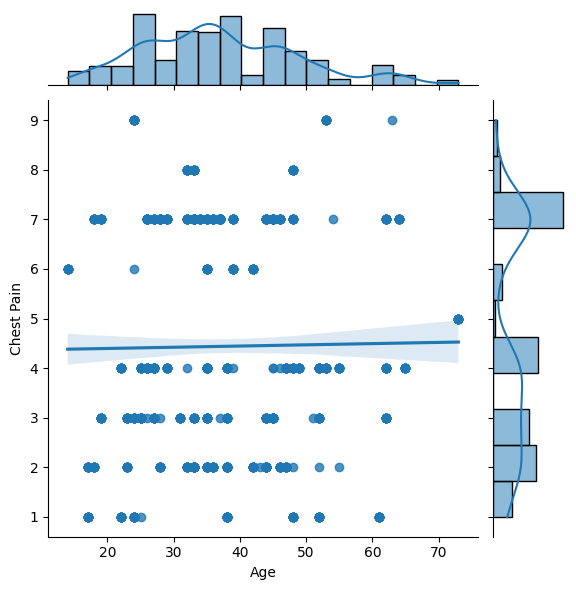

In [20]:
sns.jointplot(x='Age', y='Chest Pain', data=cancer, kind='reg')

<Axes: >

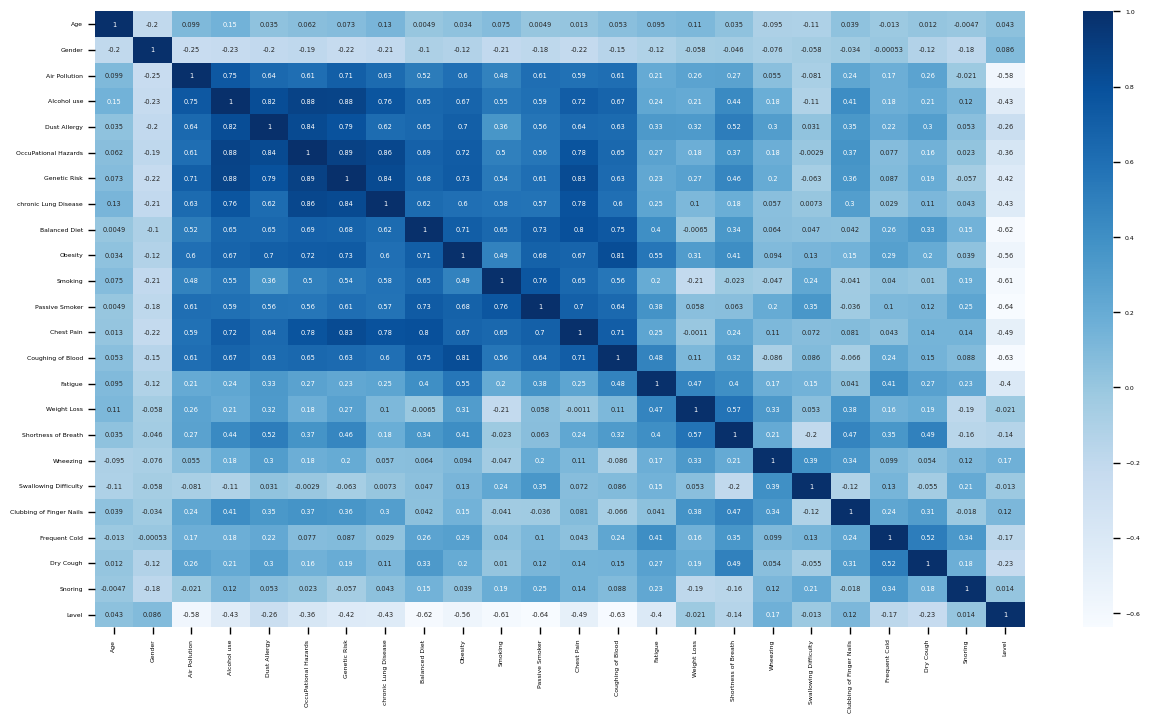

In [21]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=0.5)

cancer_mx = cancer.corr()
sns.heatmap(cancer_mx, annot=True, cmap='Blues')

<Figure size 1500x800 with 0 Axes>

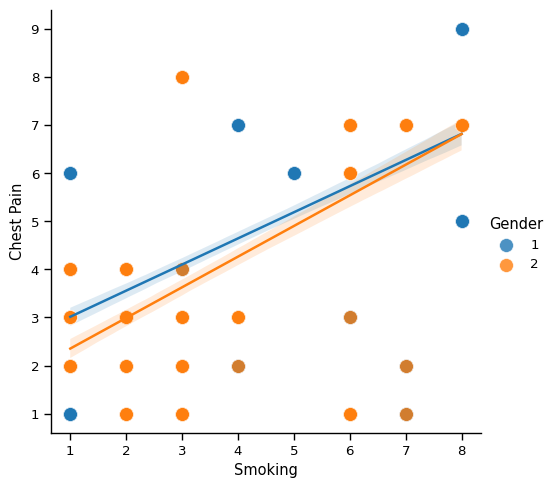

In [22]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=1.1)
sns.lmplot(x='Smoking', y='Chest Pain', hue='Gender',data=cancer,
          scatter_kws={'s':100, 'linewidth': 0.5, 'edgecolor':'w'})

<Figure size 1000x600 with 0 Axes>

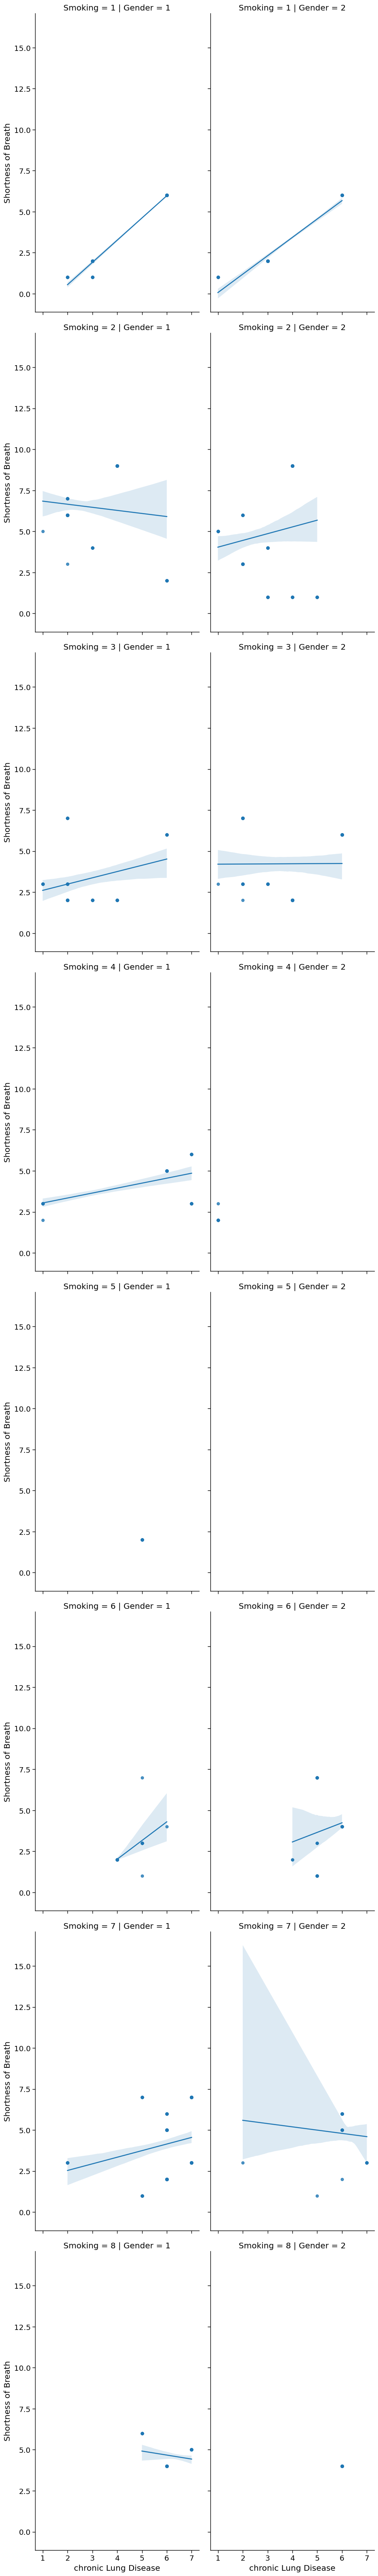

In [23]:
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.5)
sns.lmplot(x='chronic Lung Disease', y='Shortness of Breath', col='Gender', row='Smoking', data=cancer, height=8, aspect=0.6)

## Dividing the Data into features and the target

In [24]:
x = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

## Splitting the data for training and testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Logistic Regression

In [26]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
pred = model_lr.predict(x_test)

In [28]:
score = accuracy_score(pred, y_test)
print(score)

0.99


In [29]:
cm = confusion_matrix(pred, y_test)
cm

array([[68,  0,  0],
       [ 1, 60,  0],
       [ 0,  1, 70]])

In [30]:
# Classification Report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.98      0.98      0.98        61
           2       0.99      1.00      0.99        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



<Axes: >

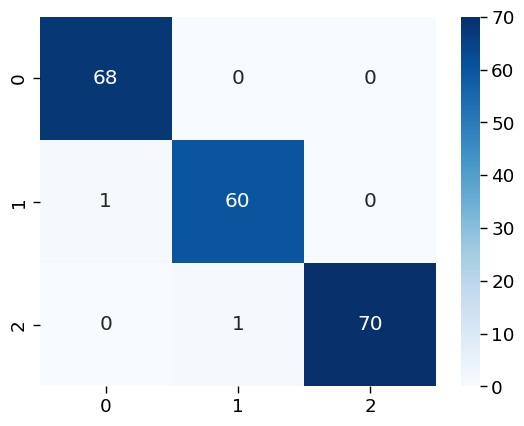

In [31]:
sns.heatmap(cm, annot=True, cmap='Blues')

## SVM Model

In [32]:
model_svm = SVC(C=1, gamma=0.01, kernel='rbf')
model_svm.fit(x_train, y_train)

SVC(C=1, gamma=0.01)

In [33]:
predict = model_svm.predict(x_test)

In [34]:
score = accuracy_score(predict, y_test)
print(score)

1.0


In [35]:
c_m = confusion_matrix(predict, y_test)
c_m

array([[69,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 70]])

In [36]:
# Classification Report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        70

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

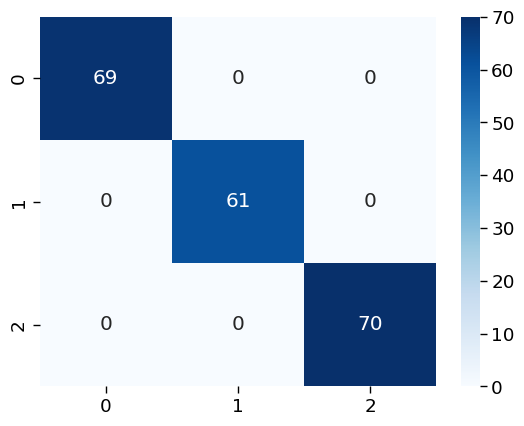

In [37]:
sns.heatmap(c_m, annot=True, cmap='Blues')